<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-545404-1691747315/blob/main/assgnment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("/content/best-selling-manga.csv").drop_duplicates()
df.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 13.1+ KB


In [5]:
df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


In [6]:
total_missing = (df.isnull().sum()).sum()
total_cells = np.product(df.shape)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("Percent of data that is missing : %d " % percent_missing)

Percent of data that is missing : 0 


<Axes: title={'center': 'Approximate Sales by Demographic'}, xlabel='Demographic', ylabel='Approximate sales in million(s)'>

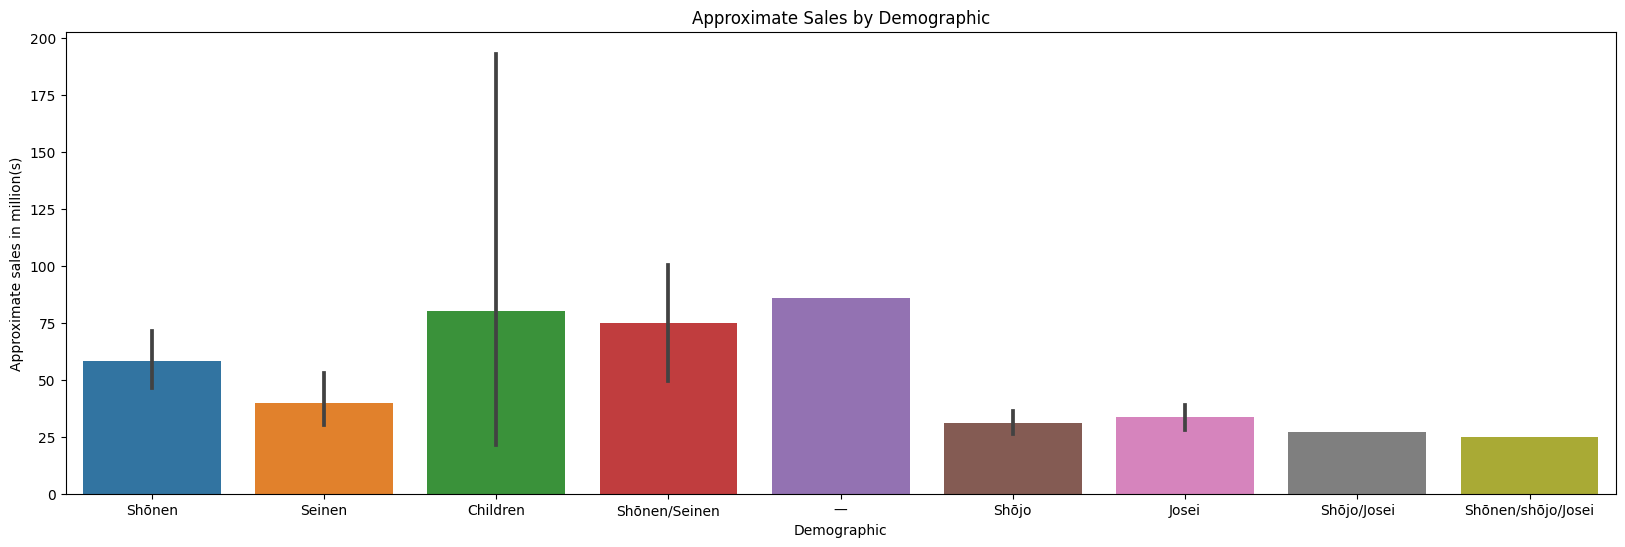

In [7]:
plt.figure(figsize = (20,6))
plt.title('Approximate Sales by Demographic')
sns.barplot(data=df, x='Demographic' , y='Approximate sales in million(s)')

In [8]:
#Drop unused columns
target = 'Approximate sales in million(s)'
df = df.drop(['Manga series','Author(s)','Publisher','Demographic','Serialized'], axis=1)
df.head()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
0,104,516.6,4.97
1,207,300.0,1.45
2,102,270.0,2.65
3,42,260.0,6.19
4,45,250.0,4.71


In [9]:
X = df.drop([target],axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
model = RandomForestRegressor(n_estimators=100, random_state=0, min_samples_split=2)
model.fit(X_train,y_train)


y_train_predict = model.predict(X_train)
train_mae = mean_absolute_error(y_train_predict, y_train)
print("MAE", train_mae)

y_test_predict = model.predict(X_test)
test_mae = mean_absolute_error(y_test_predict, y_test)
print("MAE", test_mae)

MAE 5.796972043010756
MAE 13.227430851063827


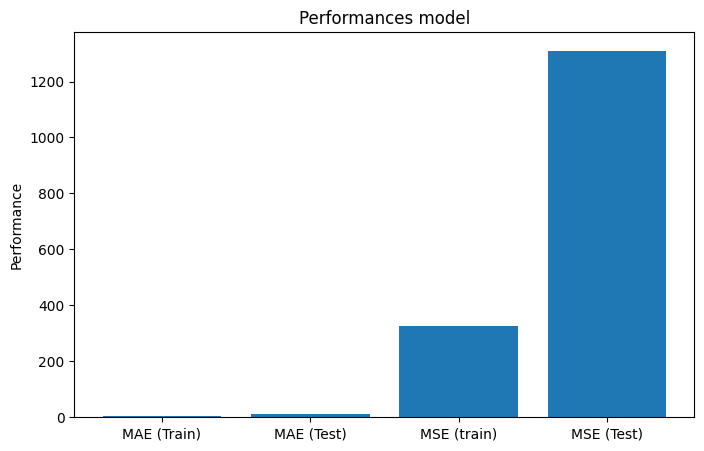

In [10]:
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)

# Placer les performances dans une liste
performance_labels = ['MAE (Train)', 'MAE (Test)', 'MSE (train)', 'MSE (Test)']
performance_values = [train_mae, test_mae, train_mse, test_mse]


plt.figure(figsize=(8, 5))
plt.bar(performance_labels, performance_values)
plt.ylabel('Performance')
plt.title('Performances model')
plt.show()